# Multi-Arm Bandit Algorithm : Bayesian UCB

In [1]:
import pandas as pd 
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

## Example : Guassian Reward & Guassian Prior

In [2]:
def run_experiment(number_of_bandit, q_true, ucb_par, number_of_run, number_of_time_step):
    
    sum_of_rewards        = np.zeros( number_of_time_step )
    count_of_actions      = np.zeros( (number_of_time_step, number_of_bandit) )
    count_of_best_actions = np.zeros( number_of_time_step )

    
    for r in range(number_of_run):    
        #q_true = np.random.normal(0,1,number_of_bandit)
        
        N_act = np.repeat( 1, number_of_bandit )
        Q_act = np.zeros( number_of_bandit )
        S_act = np.repeat( 1, number_of_bandit )
    
        list_of_actions = []
        list_of_rewards = []
        list_of_best_actions = np.zeros( number_of_time_step )
        
        for t in range(number_of_time_step):
            """Step 1: pick the machine (action) that gives the highest expected reward"""
            bUCB  = ucb_par * S_act/np.sqrt(N_act)
            Q_ucb = Q_act + bUCB
            #A = np.argmax( Q_ucb  )
            
            #Q_max = Q_ucb.max()
            #A = np.random.choice(np.flatnonzero(Q_ucb == Q_max)) 

            Q_max = Q_ucb.max()
            A = np.random.choice(np.where(Q_ucb == Q_max)[0])
            
            """Step 2: Get a radom reward from the distribution of that machine (action)"""
            reward = np.random.normal(q_true[A],1)
            
            """Step 3: Update N and Q"""
            N_act[A] += 1
            Q_act[A] += (reward - Q_act[A])/N_act[A]
            #S_act[A]  =
            
            list_of_actions.append(A)
            list_of_rewards.append(reward)
            
            if A == np.argmax(q_true):
                list_of_best_actions[t] += 1
            
        sum_of_rewards += np.array(list_of_rewards)
        count_of_best_actions += np.array( list_of_best_actions )
        
        for step, arm in enumerate(list_of_actions):
            count_of_actions[step][arm] += 1
        
    average_reward         = sum_of_rewards /np.float(number_of_run)
    percent_of_best_action = count_of_best_actions /np.float(number_of_run)
    
    return average_reward, percent_of_best_action, count_of_actions

In [3]:
number_of_bandit    = 10
number_of_run       = 2000
number_of_time_step = 1000

q_true = np.random.normal(1,1,number_of_bandit)
ucb_par = [1.0, 1.96, 2.575]

average_reward_1s, best_action_1s, _ = run_experiment(number_of_bandit, q_true, ucb_par[0], number_of_run, number_of_time_step)
average_reward_2s, best_action_2s, _ = run_experiment(number_of_bandit, q_true, ucb_par[1], number_of_run, number_of_time_step)
average_reward_3s, best_action_3s, _ = run_experiment(number_of_bandit, q_true, ucb_par[2], number_of_run, number_of_time_step)

In [4]:
[ round(q_true[i],2) for i in range(number_of_bandit) ]

[1.66, 1.88, 1.48, 0.41, 0.57, -0.38, 0.08, 2.62, 0.58, 2.47]

(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. ]),
 <a list of 7 Text major ticklabel objects>)

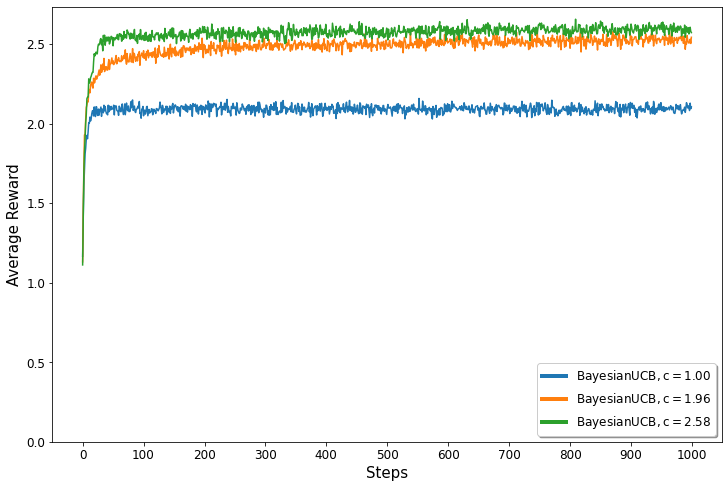

In [5]:
# Plot reward results
plt.figure(figsize = (12, 8)) 
plt.plot(average_reward_1s, label =r'$\mathrm{Bayesian UCB, c}=1.00$') 
plt.plot(average_reward_2s, label =r'$\mathrm{Bayesian UCB, c}=1.96$')
plt.plot(average_reward_3s, label =r'$\mathrm{Bayesian UCB, c}=2.58$')
plt.xlabel("Steps", fontsize=15)
plt.ylabel("Average Reward", fontsize=15)
legend = plt.legend(loc='lower right', fontsize=12, shadow=True)
for leg in legend.legendHandles:
    leg.set_linewidth(4)
#plt.xlim([-25, number_of_time_step])
plt.ylim(ymin=0)
plt.xticks(np.arange(0,1100,100), fontsize=12)
plt.yticks(fontsize=12)

([<matplotlib.axis.YTick at 0x213dc412d60>,
 <a list of 11 Text major ticklabel objects>)

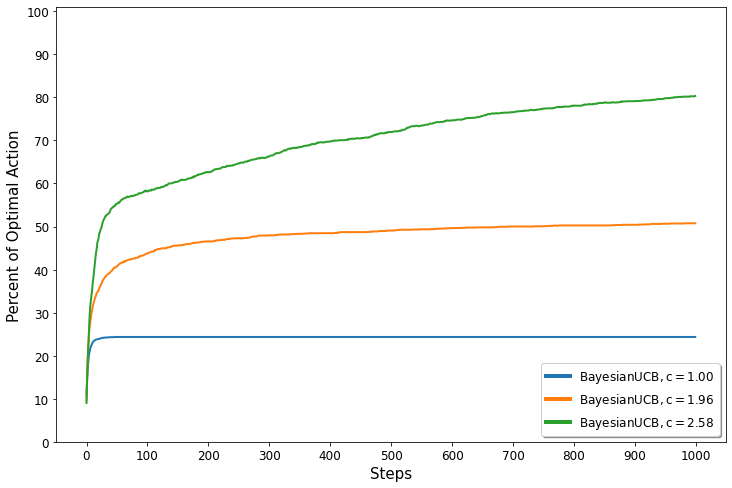

In [6]:
# Plot action results
plt.figure(figsize = (12, 8)) 
plt.plot(100*best_action_1s, linewidth=2, label =r'$\mathrm{Bayesian UCB, c}=1.00$')  
plt.plot(100*best_action_2s, linewidth=2, label =r'$\mathrm{Bayesian UCB, c}=1.96$')
plt.plot(100*best_action_3s, linewidth=2, label =r'$\mathrm{Bayesian UCB, c}=2.58$')
plt.xlabel("Steps", fontsize=15)
plt.ylabel("Percent of Optimal Action", fontsize=15)
plt.legend() 
legend = plt.legend(loc='lower right', fontsize=12, shadow=True)
for leg in legend.legendHandles:
    leg.set_linewidth(4)
#plt.xlim([-1, number_of_time_step])
plt.ylim(ymin=0, ymax=101)
plt.xticks(np.arange(0,1100,100), fontsize=12)
plt.yticks(np.arange(0,101,10), fontsize=12)

In [7]:
del run_experiment

## Example : Bernoulli Reward and Beta Prior

#### Case 1: Quantile Sampling  

In [8]:
def run_experiment(number_of_bandit, q_true, quant_param, number_of_run, number_of_time_step):
    
    sum_of_rewards        = np.zeros( number_of_time_step )
    sum_of_regrets        = np.zeros( number_of_time_step )
    count_of_actions      = np.zeros( (number_of_time_step, number_of_bandit) )
    count_of_best_actions = np.zeros( number_of_time_step )

    q_star = rg.choice( np.where(q_true == q_true.max())[0] )
    
    for r in range(number_of_run):    
        alpha = np.repeat(1, number_of_bandit)
        beta  = np.repeat(1, number_of_bandit)

        list_of_actions = []
        list_of_rewards = []
        list_of_regrets = []
        list_of_best_actions = np.zeros( number_of_time_step )
        
        for t in range(number_of_time_step):
            """Step 1: pick the machine (action) from a beta distribution"""
            d = (t+1)*( np.log(number_of_time_step) )**quant_param
            quant_value = 1.0 - 1.0/d
            Q = [ np.quantile( np.random.beta(alpha[i],beta[i],1000), quant_value) for i in range(number_of_bandit) ]
            Q = np.array(Q)
            
            Q_max = Q.max()
            A = np.random.choice(np.where(Q == Q_max)[0])
            
            """Step 2: Get reward from Bernoulli distribution of that machine (action)"""
            #if np.random.random() <= np.random.beta(alpha[A], beta[A]):
            #    reward = 1
            #    alpha[A] += 1
            #else:
            #    reward = 0
            #    beta[A] += 1
                
            reward = np.random.binomial(n=1, p=q_true[A], size=1)[0]
            
            """Step 3: Update alpha and beta"""
            if reward == 1: 
                alpha[A] += 1
            else:
                beta[A] += 1
        
            
            """Step 4: Update actions, rewards, and regrets"""
            list_of_actions.append(A)
            list_of_rewards.append(reward)
            
            regret = q_star - q_true[A]
            list_of_regrets.append(regret)
                       
            if A == np.argmax(q_true):
                list_of_best_actions[t] += 1
            
        sum_of_rewards += np.array(list_of_rewards)
        sum_of_regrets += np.array(list_of_regrets)
        count_of_best_actions += np.array( list_of_best_actions )
        
        for step, arm in enumerate(list_of_actions):
            count_of_actions[step][arm] += 1
        
    average_reward         = sum_of_rewards /np.float(number_of_run)
    average_regret         = sum_of_regrets /np.float(number_of_run)
    percent_of_best_action = count_of_best_actions /np.float(number_of_run)
    
    return average_reward, average_regret, percent_of_best_action, count_of_actions

In [9]:
rg = np.random.default_rng(seed=1309)

number_of_bandit    = 10
number_of_run       = 750
number_of_time_step = 1000

q_true = rg.beta(2, 2, number_of_bandit)
#q_true = [0.10, 0.50, 0.60, 0.80, 0.10, 0.25, 0.60, 0.45, 0.75, 0.65]
print( [round(q_true[i],2) for i in range(number_of_bandit)] )

quant_param = [0.00, 0.25, 0.50]

average_reward_1, average_regret_1, best_action_1, action_1 = run_experiment(number_of_bandit, q_true, quant_param[0], number_of_run, number_of_time_step)
average_reward_2, average_regret_2, best_action_2, action_2 = run_experiment(number_of_bandit, q_true, quant_param[1], number_of_run, number_of_time_step)
average_reward_3, average_regret_3, best_action_3, action_3 = run_experiment(number_of_bandit, q_true, quant_param[2], number_of_run, number_of_time_step)

[0.25, 0.53, 0.89, 0.26, 0.43, 0.21, 0.45, 0.18, 0.84, 0.27]


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 6 Text major ticklabel objects>)

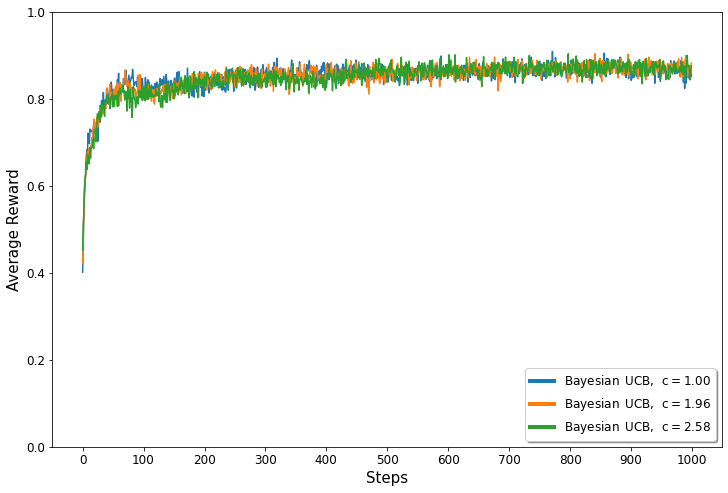

In [10]:
# Plot reward results
plt.figure(figsize = (12, 8)) 
plt.plot(average_reward_1, label =r'$\mathrm{Bayesian \hspace{0.5} UCB, \hspace{0.5} c}=1.00$') 
plt.plot(average_reward_2, label =r'$\mathrm{Bayesian \hspace{0.5} UCB, \hspace{0.5} c}=1.96$')
plt.plot(average_reward_3, label =r'$\mathrm{Bayesian \hspace{0.5} UCB, \hspace{0.5} c}=2.58$')
plt.xlabel("Steps", fontsize=15)
plt.ylabel("Average Reward", fontsize=15)
legend = plt.legend(loc='lower right', fontsize=12, shadow=True)
for leg in legend.legendHandles:
    leg.set_linewidth(4)
#plt.xlim([-25, number_of_time_step])
plt.ylim(ymin=0, ymax=1.0)
plt.xticks(np.arange(0,1100,100), fontsize=12)
plt.yticks(fontsize=12)

In [ ]:
# Plot action results
plt.figure(figsize = (12, 8)) 
plt.plot(100*best_action_1, linewidth=2, label =r'$\mathrm{Bayesian UCB, c}=0.00$')  
plt.plot(100*best_action_2, linewidth=2, label =r'$\mathrm{Bayesian UCB, c}=0.25$')
plt.plot(100*best_action_3, linewidth=2, label =r'$\mathrm{Bayesian UCB, c}=0.50$')
plt.xlabel("Steps", fontsize=15)
plt.ylabel("Percent of Optimal Action", fontsize=15)
plt.legend() 
legend = plt.legend(loc='lower right', fontsize=12, shadow=True)
for leg in legend.legendHandles:
    leg.set_linewidth(4)
#plt.xlim([-1, number_of_time_step])
plt.ylim(ymin=0, ymax=101)
plt.xticks(np.arange(0,1100,100), fontsize=12)
plt.yticks(np.arange(0,101,10), fontsize=12)

<ipython-input-11-95bc6b118f0d>:8: MatplotlibDeprecationWarning: Unrecognized location 'top right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  legend = plt.legend(loc='top right', fontsize=12, shadow=True)


(array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7]),
 <a list of 8 Text major ticklabel objects>)

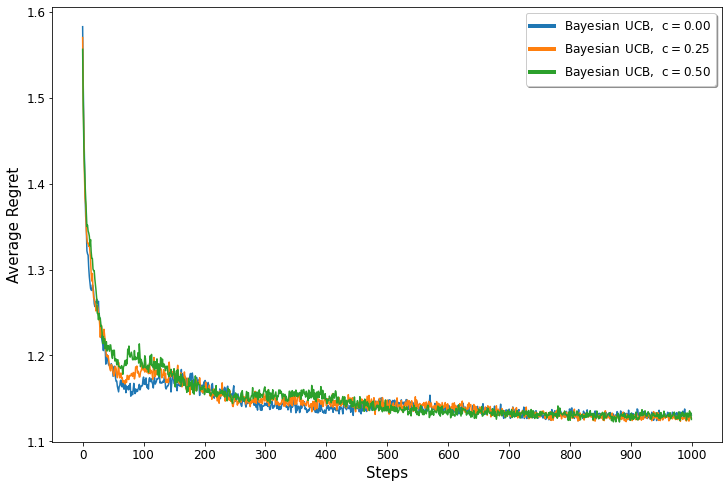

In [11]:
# Plot regret results
plt.figure(figsize = (12, 8)) 
plt.plot(average_regret_1, label =r'$\mathrm{Bayesian \hspace{0.5} UCB, \hspace{0.5} c}=0.00$') 
plt.plot(average_regret_2, label =r'$\mathrm{Bayesian \hspace{0.5} UCB, \hspace{0.5} c}=0.25$')
plt.plot(average_regret_3, label =r'$\mathrm{Bayesian \hspace{0.5} UCB, \hspace{0.5} c}=0.50$')
plt.xlabel("Steps", fontsize=15)
plt.ylabel("Average Regret", fontsize=15)
legend = plt.legend(loc='upper right', fontsize=12, shadow=True)
for leg in legend.legendHandles:
    leg.set_linewidth(4)
#plt.xlim([-25, number_of_time_step])
plt.ylim(ymin=1)
plt.xticks(np.arange(0,1100,100), fontsize=12)
plt.yticks(fontsize=12)

In [ ]:
# Plot individual action results
plt.figure(figsize = (12, 8)) 

action = [action_1, action_2, action_3]

for i in range( number_of_bandit ):
    action_pct = 100 * action[2][:,i] / number_of_run
    steps = list( np.array(range(len(action_pct))) )
    plt.plot( steps, action_pct, "-", linewidth=2, label="Arm {} ({:.2f})".format(i+1, q_true[i]))
plt.xlabel("Steps", fontsize=15)
plt.ylabel("Count Percentage of Individual Action", fontsize=15)
legend = plt.legend(loc='lower right', shadow=True)
for leg in legend.legendHandles:
    leg.set_linewidth(4)
#plt.xlim([-1, number_of_time_step])
plt.ylim(ymin=0)
plt.xticks(np.arange(0,1100,100), fontsize=12)
plt.yticks(fontsize=12)

#### Case 2 : Sampling Randomly from the Distribution 

In [22]:
def run_experiment(number_of_bandit, q_true, quant_param, number_of_run, number_of_time_step):
    
    sum_of_rewards        = np.zeros( number_of_time_step )
    sum_of_regrets        = np.zeros( number_of_time_step )
    count_of_actions      = np.zeros( (number_of_time_step, number_of_bandit) )
    count_of_best_actions = np.zeros( number_of_time_step )

    q_star = np.random.choice( np.where(q_true == q_true.max())[0] )

    for r in range(number_of_run):    
        alpha = np.repeat(1, number_of_bandit)
        beta  = np.repeat(1, number_of_bandit)

        list_of_actions = []
        list_of_rewards = []
        list_of_regrets = []
        list_of_best_actions = np.zeros( number_of_time_step )
        
        for t in range(number_of_time_step):
            """Step 1: pick the machine (action) from a beta distribution"""
            d = (t+1)*( np.log(number_of_time_step) )**quant_param
            quant_value = 1.0 - 1.0/d
            Q = [ rg.beta(alpha[i],beta[i]) for i in range(number_of_bandit) ]
            Q = np.array(Q)
            
            Q_max = Q.max()
            A = rg.choice(np.where(Q == Q_max)[0])
            
            """Step 2: Get reward from Bernoulli distribution of that machine (action)"""
            #if np.random.random() <= np.random.beta(alpha[A], beta[A]):
            #    reward = 1
            #    alpha[A] += 1
            #else:
            #    reward = 0
            #    beta[A] += 1
                
            reward = np.random.binomial(n=1, p=q_true[A], size=1)[0]
            
            """Step 3: Update alpha and beta"""
            if reward == 1: 
                alpha[A] += 1
            else:
                beta[A] += 1
                        
            """Step 4: Collect actions, rewards, and regrets"""
            list_of_actions.append(A)
            list_of_rewards.append(reward)
            
            regret = q_star - q_true[A]
            list_of_regrets.append(regret)
            
            if A == np.argmax(q_true):
                list_of_best_actions[t] += 1
            
        sum_of_rewards += np.array(list_of_rewards)
        sum_of_regrets += np.array(list_of_regrets)
        count_of_best_actions += np.array( list_of_best_actions )
        
        for step, arm in enumerate(list_of_actions):
            count_of_actions[step][arm] += 1
        
    average_reward         = sum_of_rewards /np.float(number_of_run)
    average_regret         = sum_of_regrets /np.float(number_of_run)
    percent_of_best_action = count_of_best_actions /np.float(number_of_run)
    
    return average_reward, average_regret, percent_of_best_action, count_of_actions

In [34]:
rg = np.random.default_rng( seed=1309 )

number_of_bandit    = 10
number_of_run       = 2000
number_of_time_step = 1000

q_true = rg.beta(10, 10, number_of_bandit)
print( [round(q_true[i],2) for i in range(number_of_bandit)] )

quant_param = [0.00, 0.25, 0.50]

average_reward_1, average_regret_1, best_action_1, action_1 = run_experiment(number_of_bandit, q_true, quant_param[0], number_of_run, number_of_time_step)
average_reward_2, average_regret_2, best_action_2, action_2 = run_experiment(number_of_bandit, q_true, quant_param[1], number_of_run, number_of_time_step)
average_reward_3, average_regret_3, best_action_3, action_3 = run_experiment(number_of_bandit, q_true, quant_param[2], number_of_run, number_of_time_step)

[0.38, 0.51, 0.49, 0.48, 0.57, 0.54, 0.44, 0.76, 0.37, 0.45]


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 6 Text major ticklabel objects>)

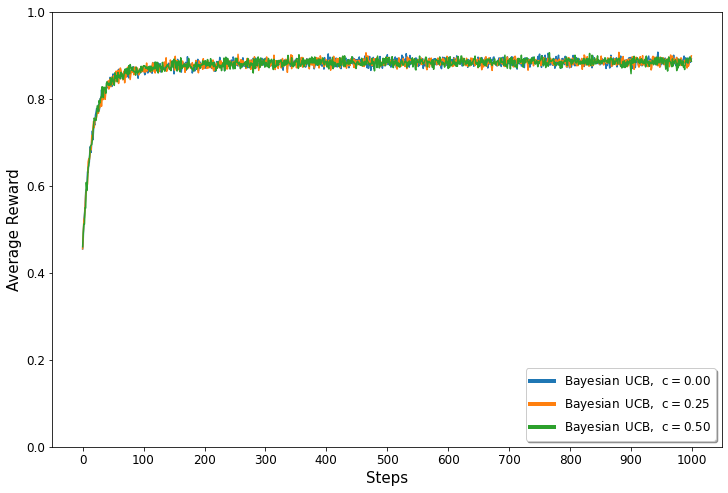

In [30]:
# Plot reward results
plt.figure(figsize = (12, 8)) 
plt.plot(average_reward_1, label =r'$\mathrm{Bayesian \hspace{0.5} UCB, \hspace{0.5} c}=0.00$') 
plt.plot(average_reward_2, label =r'$\mathrm{Bayesian \hspace{0.5} UCB, \hspace{0.5} c}=0.25$')
plt.plot(average_reward_3, label =r'$\mathrm{Bayesian \hspace{0.5} UCB, \hspace{0.5} c}=0.50$')
plt.xlabel("Steps", fontsize=15)
plt.ylabel("Average Reward", fontsize=15)
legend = plt.legend(loc='lower right', fontsize=12, shadow=True)
for leg in legend.legendHandles:
    leg.set_linewidth(4)
#plt.xlim([-25, number_of_time_step])
plt.ylim(ymin=0, ymax=1.0)
plt.xticks(np.arange(0,1100,100), fontsize=12)
plt.yticks(fontsize=12)

(array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6]),
 <a list of 7 Text major ticklabel objects>)

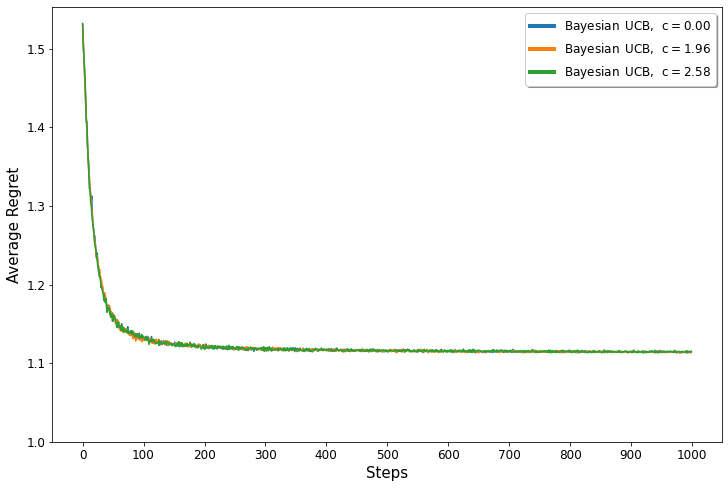

In [31]:
# Plot regret results
plt.figure(figsize = (12, 8)) 
plt.plot(average_regret_1, label =r'$\mathrm{Bayesian \hspace{0.5} UCB, \hspace{0.5} c}=0.00$') 
plt.plot(average_regret_2, label =r'$\mathrm{Bayesian \hspace{0.5} UCB, \hspace{0.5} c}=0.25$')
plt.plot(average_regret_3, label =r'$\mathrm{Bayesian \hspace{0.5} UCB, \hspace{0.5} c}=0.50$')
plt.xlabel("Steps", fontsize=15)
plt.ylabel("Average Regret", fontsize=15)
legend = plt.legend(loc='upper right', fontsize=12, shadow=True)
for leg in legend.legendHandles:
    leg.set_linewidth(4)
#plt.xlim([-25, number_of_time_step])
plt.ylim(ymin=1)
plt.xticks(np.arange(0,1100,100), fontsize=12)
plt.yticks(fontsize=12)

([<matplotlib.axis.YTick at 0x213de79c430>,
 <a list of 11 Text major ticklabel objects>)

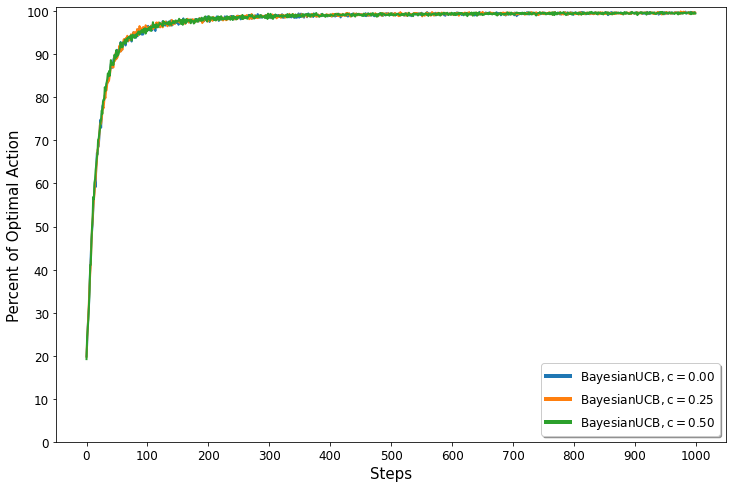

In [32]:
# Plot action results
plt.figure(figsize = (12, 8)) 
plt.plot(100*best_action_1, linewidth=2, label =r'$\mathrm{Bayesian UCB, c}=0.00$')  
plt.plot(100*best_action_2, linewidth=2, label =r'$\mathrm{Bayesian UCB, c}=0.25$')
plt.plot(100*best_action_3, linewidth=2, label =r'$\mathrm{Bayesian UCB, c}=0.50$')
plt.xlabel("Steps", fontsize=15)
plt.ylabel("Percent of Optimal Action", fontsize=15)
plt.legend() 
legend = plt.legend(loc='lower right', fontsize=12, shadow=True)
for leg in legend.legendHandles:
    leg.set_linewidth(4)
#plt.xlim([-1, number_of_time_step])
plt.ylim(ymin=0, ymax=101)
plt.xticks(np.arange(0,1100,100), fontsize=12)
plt.yticks(np.arange(0,101,10), fontsize=12)

(array([  0.,  20.,  40.,  60.,  80., 100.]),
 <a list of 6 Text major ticklabel objects>)

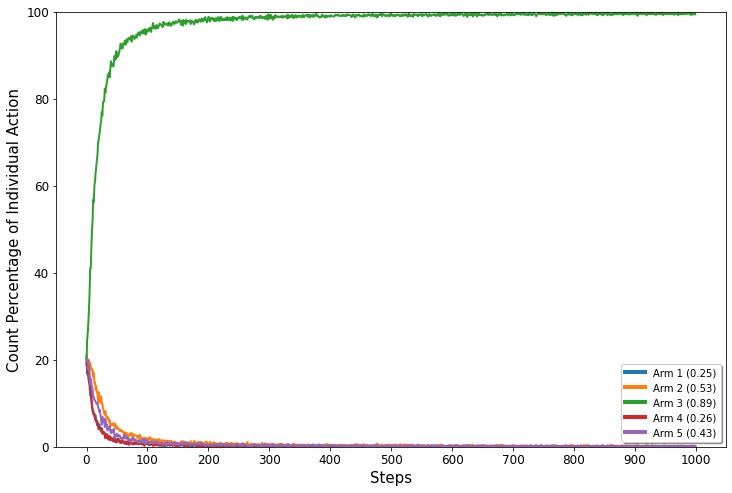

In [33]:
# Plot individual action results
plt.figure(figsize = (12, 8)) 

action = [action_1, action_2, action_3]

for i in range( number_of_bandit ):
    action_pct = 100 * action[2][:,i] / number_of_run
    steps = list( np.array(range(len(action_pct))) )
    plt.plot( steps, action_pct, "-", linewidth=2, label="Arm {} ({:.2f})".format(i+1, q_true[i]))
plt.xlabel("Steps", fontsize=15)
plt.ylabel("Count Percentage of Individual Action", fontsize=15)
legend = plt.legend(loc='lower right', shadow=True)
for leg in legend.legendHandles:
    leg.set_linewidth(4)
#plt.xlim([-1, number_of_time_step])
plt.ylim(ymin=0, ymax=100)
plt.xticks(np.arange(0,1100,100), fontsize=12)
plt.yticks(fontsize=12)

In [21]:
c = 0.50

alpha = np.repeat(1, number_of_bandit)
beta  = np.repeat(1, number_of_bandit)

for t in range(10):
    d = (t+1)*( np.log(number_of_time_step) )**c
    quantile_value = 1.0 - 1.0/d
    #print( round(quantile_value,2), end=', ')
    Q = [ np.quantile( np.random.beta(alpha[i], beta[i], 10000), quantile_value) for i in range(number_of_bandit) ]
    #Q = np.array(Q)
    print( round(quantile_value,4), [round(Q[i],4) for i in range(10)] )
    #A = np.random.choice(np.where(Q == Q.max())[0])
    #A

0.6195 [0.6153, 0.6178, 0.6214, 0.6211, 0.6157, 0.6241, 0.6189, 0.6209, 0.618, 0.6171]
0.8098 [0.8083, 0.8203, 0.8025, 0.8098, 0.8068, 0.8075, 0.8128, 0.8043, 0.8097, 0.8164]
0.8732 [0.8767, 0.8755, 0.8738, 0.8727, 0.8746, 0.8725, 0.8723, 0.8723, 0.8738, 0.8704]
0.9049 [0.9056, 0.9047, 0.9094, 0.8985, 0.9065, 0.9003, 0.905, 0.9061, 0.9027, 0.9047]
0.9239 [0.9198, 0.9286, 0.9249, 0.9234, 0.9199, 0.9179, 0.9288, 0.9228, 0.9219, 0.9255]
0.9366 [0.9358, 0.938, 0.9374, 0.9357, 0.9364, 0.9357, 0.9401, 0.9332, 0.9405, 0.9346]
0.9456 [0.9447, 0.9442, 0.9426, 0.9442, 0.9439, 0.9487, 0.946, 0.9454, 0.9434, 0.9475]
0.9524 [0.9537, 0.9515, 0.9545, 0.9542, 0.9526, 0.9514, 0.9516, 0.951, 0.9546, 0.9507]
0.9577 [0.9568, 0.9564, 0.9566, 0.9566, 0.9596, 0.957, 0.9609, 0.9599, 0.9554, 0.958]
0.962 [0.9624, 0.9605, 0.9634, 0.9632, 0.9605, 0.9648, 0.9645, 0.9632, 0.966, 0.9621]
